# Demand Prediction Analysis

In [100]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import common
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import clustering
import plotting

# Loading Data

In [97]:
n_rows = 100000
df = common.load_data(nrows=n_rows)

Executing: load_data
With Args: None
With Kwargs: 
	nrows : 100000
Result: <class 'pandas.core.frame.DataFrame'>
Execution Duration: 0.344249010086 seconds



# Seaborn Properties

In [101]:
sns.set_context("poster", font_scale=1.5)

# NYC Station Partitioning

In [102]:
n_clusters = 200
pickup_cls = clustering.cluster_pickups(df, n_clusters=n_clusters)
dropoff_cls = clustering.cluster_dropoffs(df, n_clusters=n_clusters)

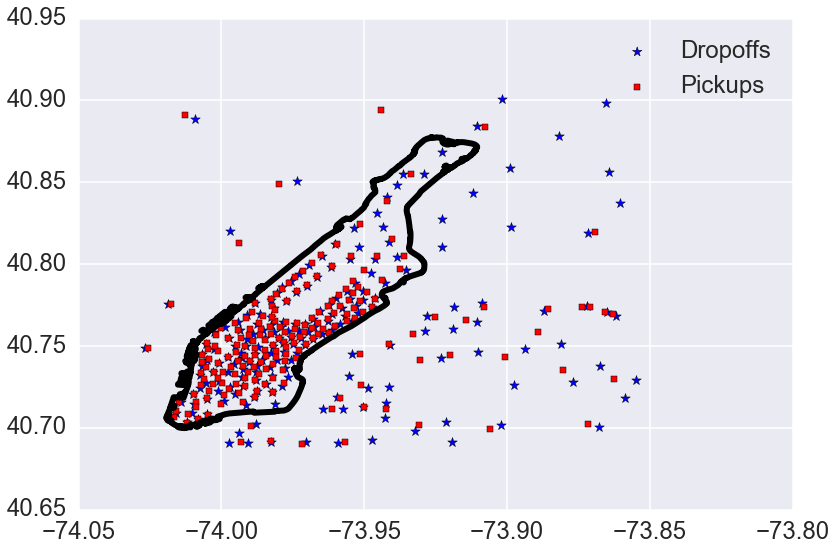

In [103]:
fig, ax = plt.subplots(1, 1)
plotting.plot_manhattan(ax)
ax.scatter(
    dropoff_cls.cluster_centers_[:, 0],
    dropoff_cls.cluster_centers_[:, 1],
    marker="*", s=100, c="b", label="Dropoffs")
ax.scatter(
    pickup_cls.cluster_centers_[:, 0],
    pickup_cls.cluster_centers_[:, 1],
    marker="s", s=40, c="r", label="Pickups")
ax.legend()

# Demand Probabilties

In [104]:
import tqdm
freqs = np.zeros((n_clusters, n_clusters))
for i, row in tqdm.tqdm(df.iterrows(), total=n_rows):
    pickup = np.array([row["pickup_longitude"],
                       row["pickup_latitude"]])
    dropoff = np.array([row["dropoff_longitude"],
                        row["dropoff_latitude"]])
    p_label = pickup_cls.predict(pickup)[0]
    d_label = dropoff_cls.predict(dropoff)[0]
    freqs[p_label][d_label] += 1

100%|██████████| 100000/100000 [01:13<00:00, 1367.70it/s]


In [105]:
probs = freqs / freqs.sum(axis=1)